In [ ]:
# Regresja liniowa jest używana do przewidywania wartości ciągłych.
# Regresja logistyczna jest używana do klasyfikacji binarnej.
# Regresja softmax jest używana do klasyfikacji wieloklasowej.

In [4]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
np.random.seed(42)  # aby wyniki były odtwarzalne
m = 100 


In [5]:
X = 2 * np.random.rand(m, 1)  # wektor kolumnowy
y = 4 + 3 * X + np.random.randn(m, 1)

In [6]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())
print(sgd_reg.intercept_)
print(sgd_reg.coef_)

[4.21278812]
[2.77270267]


In [7]:
# Generujmy przykładowy zestaw danych
X, y = make_regression(n_samples=100, n_features=10, noise=0.1,random_state=43)

# Podzielmy zestaw danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Użyjmy OLS
ols = LinearRegression()
ols.fit(X_train, y_train)
print("OLS:", ols.score(X_test, y_test))

# Użyjmy SGD
sgd = SGDRegressor(loss="squared_error", max_iter=1000, tol=1e-3)
sgd.fit(X_train, y_train)
print("SGD:", sgd.score(X_test, y_test))

#

OLS: 0.9999995439610806
SGD: 0.9999983211328161


In [ ]:
# Ordinary Least Squares (OLS):
# Użyj, gdy:
# Masz mały lub średni rozmiar zestawu danych.
# Chcesz uzyskać dokładne wyniki, ale nie masz ograniczeń czasowych.
# Nie masz problemu z wielokolliniarnością (wysokim współczynnikiem wariancji) w danych.
# Unikaj, gdy:
# Masz bardzo duży rozmiar zestawu danych (ponieważ OLS może być wolny).
# Masz problemy z wielokolliniarnością w danych.
# Stochastic Gradient Descent (SGD):
# Użyj, gdy:
# Masz bardzo duży rozmiar zestawu danych (SGD jest szybszy niż OLS).
# Chcesz uzyskać szybkie wyniki, ale nie masz wymagań co do dokładności.
# Masz problemy z wielokolliniarnością w danych (SGD jest bardziej odporny na to).
# Unikaj, gdy:
# Masz mały lub średni rozmiar zestawu danych (SGD może być mniej dokładny niż OLS).
# Chcesz uzyskać dokładne wyniki (SGD może być mniej dokładny niż OLS).
# Mini-batch Gradient Descent:
# Użyj, gdy:
# Masz duży rozmiar zestawu danych, ale nie tak duży, aby użyć SGD.
# Chcesz uzyskać szybkie wyniki, ale nie masz wymagań co do dokładności.
# Masz problemy z wielokolliniarnością w danych (mini-batch GD jest bardziej odporny na to).
# Unikaj, gdy:
# Masz mały lub średni rozmiar zestawu danych (mini-batch GD może być mniej dokładny niż OLS).
# Chcesz uzyskać dokładne wyniki (mini-batch GD może być mniej dokładny niż OLS).
# Singular Value Decomposition (SVD):
# Użyj, gdy:
# Masz problemy z wielokolliniarnością w danych (SVD jest bardziej stabilny niż OLS).
# Chcesz uzyskać dokładne wyniki, ale nie masz ograniczeń czasowych.
# Masz mały lub średni rozmiar zestawu danych.
# Unikaj, gdy:
# Masz bardzo duży rozmiar zestawu danych (SVD może być wolny).
# Nie masz problemu z wielokolliniarnością w danych (SVD może być mniej dokładny niż OLS).

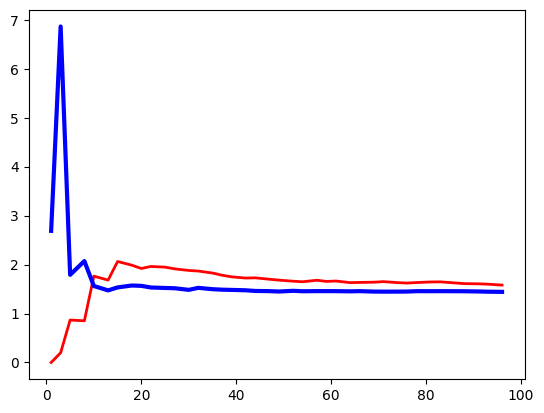

In [8]:
# krzywe uczenia
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
train_sizes, training_scores, valid_scores = learning_curve(LinearRegression(), X, y, cv=30, train_sizes=np.linspace(0.01, 1.0, 40), scoring="neg_root_mean_squared_error")

train_errors = -training_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-", linewidth=2, label="Zbiór uczący")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="Zbiór walidacyjny")
plt.show()






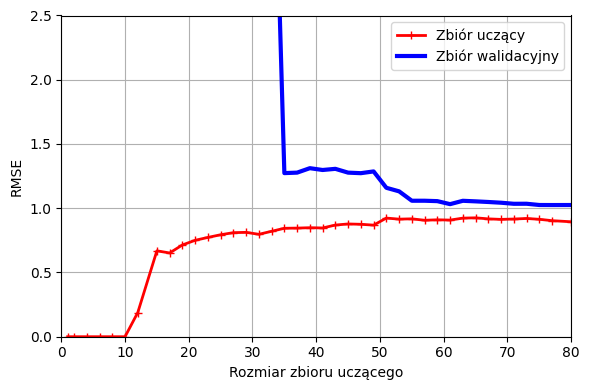

In [9]:
from sklearn.pipeline import make_pipeline
from pathlib import Path

from sklearn.preprocessing import PolynomialFeatures
IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="Zbiór uczący")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="Zbiór walidacyjny")
plt.legend(loc="upper right")
plt.xlabel("Rozmiar zbioru uczącego")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
save_fig("learning_curves_plot")
plt.show()